In [1]:
#importing required libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from sklearn import preprocessing
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#size of the training data set
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Checking the len of Training Data set
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0] # is the first index position

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

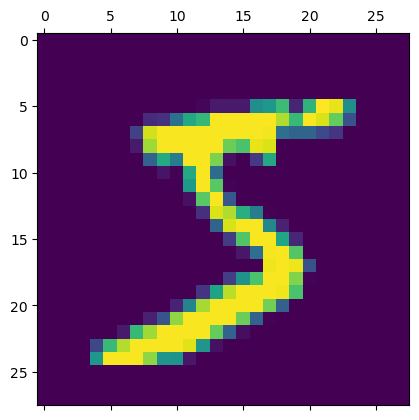

In [7]:
# showing the  first image in 2-D matrix in matplotlib

plt.matshow(X_train[0])

In [8]:
# checking the above o/p with out y_train eg we got X_train[0]=5 and y_train[0]=5

y_train[0] 

5

In [9]:
#dividing the images by 255 will make the range between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# going to flatten our training data and test data set i.e Column stacking by using reshape() from pandas

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
#Checking the conversion of 2-D into 1-D

X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# creating a simple neural network using keras

model = keras.Sequential([
keras.layers.Dense(600,input_shape=(784,), activation = "relu"),
keras.layers.Dense(400, activation = "sigmoid"),  ####hidden layers
keras.layers.Dense(200, activation = "sigmoid"),
keras.layers.Dense(75, activation = "sigmoid"),
keras.layers.Dense(10, activation = "softmax")
])

In [15]:
#compiling the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [16]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2959 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0983 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0664 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0393 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0310 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0217 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0182 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [17]:
#Evaluating the model

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9785


[0.08250461518764496, 0.9785000085830688]

In [18]:
y_predictions = model.predict(X_test_flattened)
print(y_test[0])

313/313 [==============================] - 1s 3ms/step
7


In [19]:
np.argmax(y_predictions[0])

7

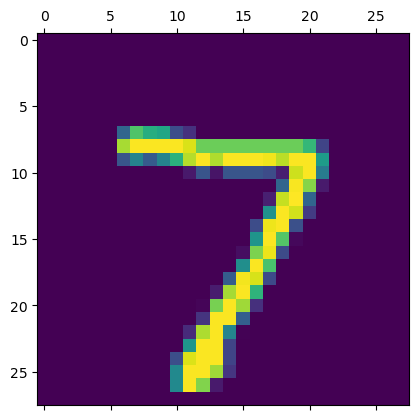

In [20]:
plt.matshow(X_test[0])

# Regularization Technique

In [21]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [22]:
model = Sequential([Flatten(input_shape=(784,)),
                    Dense(256, activation='sigmoid'),
                    Dropout(0.2),
                    Dense(128, activation='sigmoid'),
                    Dropout(0.1),
                    Dense(10, activation='softmax')
                    ])
model.compile( optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
early_stopping = [EarlyStopping (monitor='val_accuracy', patience = 3)]

In [24]:
model.fit(X_train_flattened, y_train, epochs=100, batch_size=2000, validation_split=0.2, callbacks = early_stopping)

Epoch 1/100
24/24 [==============================] - 2s 47ms/step - loss: 2.1831 - accuracy: 0.2546 - val_loss: 1.8470 - val_accuracy: 0.6580
Epoch 2/100
24/24 [==============================] - 1s 43ms/step - loss: 1.5834 - accuracy: 0.6246 - val_loss: 1.1954 - val_accuracy: 0.8090
Epoch 3/100
24/24 [==============================] - 1s 39ms/step - loss: 1.0386 - accuracy: 0.7623 - val_loss: 0.7725 - val_accuracy: 0.8537
Epoch 4/100
24/24 [==============================] - 1s 40ms/step - loss: 0.7324 - accuracy: 0.8248 - val_loss: 0.5596 - val_accuracy: 0.8798
Epoch 5/100
24/24 [==============================] - 1s 39ms/step - loss: 0.5711 - accuracy: 0.8573 - val_loss: 0.4469 - val_accuracy: 0.8938
Epoch 6/100
24/24 [==============================] - 1s 40ms/step - loss: 0.4795 - accuracy: 0.8750 - val_loss: 0.3837 - val_accuracy: 0.9003
Epoch 7/100
24/24 [==============================] - 1s 39ms/step - loss: 0.4215 - accuracy: 0.8869 - val_loss: 0.3430 - val_accuracy: 0.9077
Epoch 

24/24 [==============================] - 1s 39ms/step - loss: 0.0789 - accuracy: 0.9768 - val_loss: 0.0960 - val_accuracy: 0.9718
Epoch 59/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0800 - accuracy: 0.9768 - val_loss: 0.0955 - val_accuracy: 0.9718
Epoch 60/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0764 - accuracy: 0.9773 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 61/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 62/100
24/24 [==============================] - 1s 41ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0925 - val_accuracy: 0.9725
Epoch 63/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.0919 - val_accuracy: 0.9727
Epoch 64/100
24/24 [==============================] - 1s 41ms/step - loss: 0.0699 - accuracy: 0.9793 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 65/100

In [25]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print("")
print("loss : {}".format(loss_and_metrics[0]))
print("accuracy : {}".format(loss_and_metrics[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9767

loss : 0.07786146551370621
accuracy : 0.9767000079154968


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9767


[0.07786146551370621, 0.9767000079154968]